In [ ]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv(r"D:\Machine Learning Projects\JamboreeEducation-LinearRegression\Jamboree_Admission.csv",low_memory=False)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# check the Dataset Size
df.shape

(500, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
# check the missing values in dataset
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# check the duplicates in Dataset
df.duplicated().sum()

np.int64(0)

In [ ]:
# statstcal summary of numerical columns
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [34]:
# drop the Serial No as it does not provive an information
df.drop(columns=['Serial No.'], inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Exploratoty Data Analysis

#### Univariate Analysis

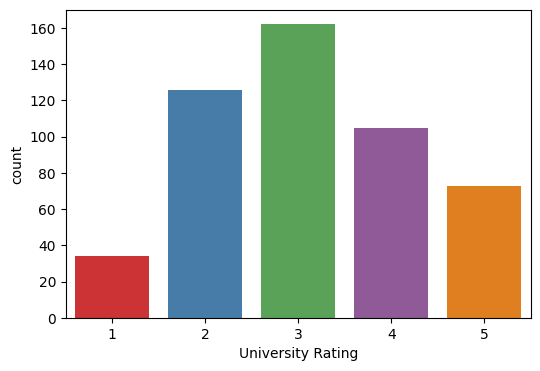

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='University Rating', palette='Set1')
plt.show()

##### Few Univesities are with rank 1 and most of them are between 2 and 4

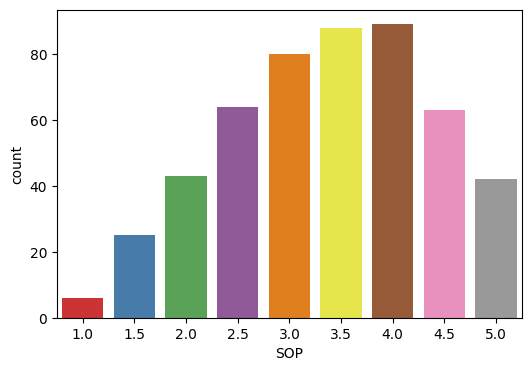

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='SOP', palette='Set1')
plt.show()

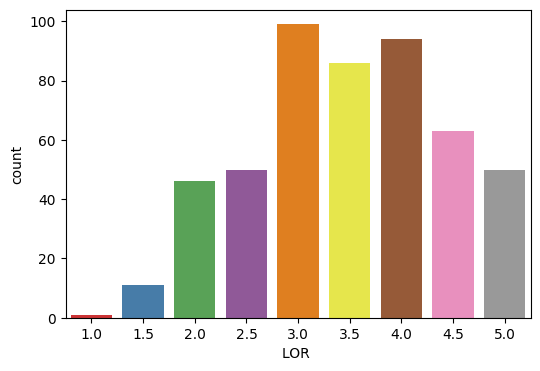

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='LOR ', palette='Set1')
plt.show()

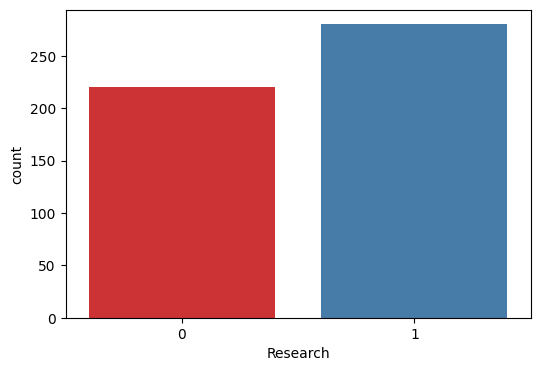

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Research', palette='Set1')
plt.show()

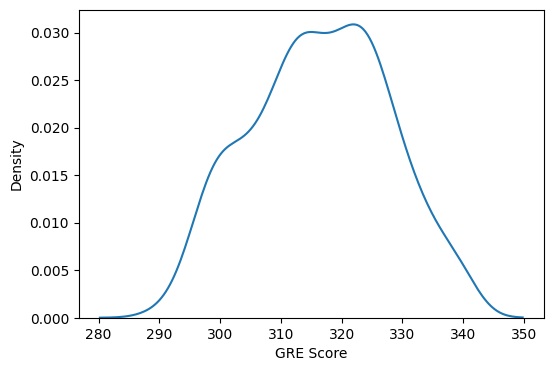

In [35]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='GRE Score')
plt.show()

#### As the above diagram looks close to normal distribution so lets check the outliers

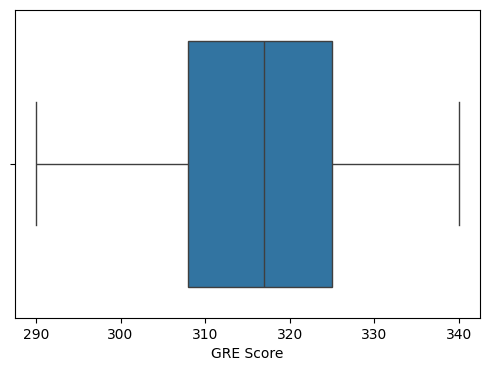

In [36]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='GRE Score')
plt.show()

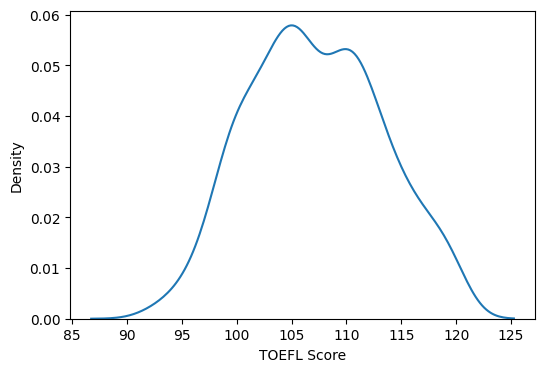

In [37]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='TOEFL Score')
plt.show()

#### Here also same like above the diagram looks almost normally distributed so lets check outliers.

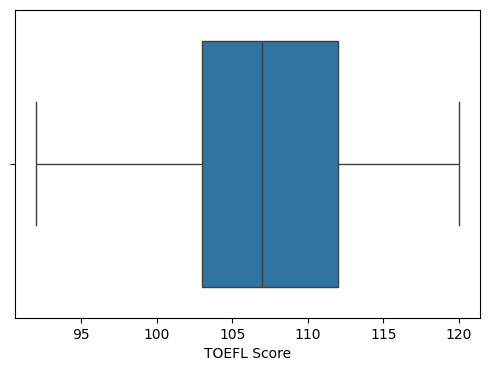

In [38]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='TOEFL Score')
plt.show()

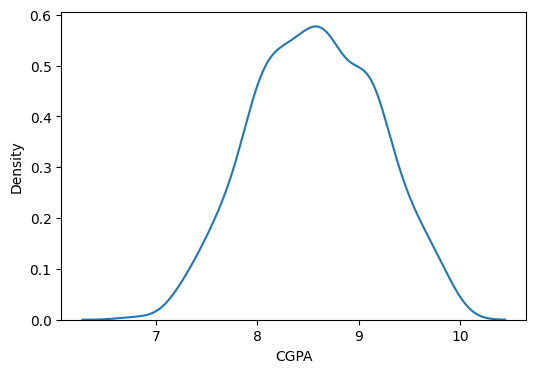

In [39]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='CGPA')
plt.show()

#### Here the data looks normally Distributed

#### Bivariate Analysis